In [1]:
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam
import matplotlib.pyplot as plt
import pickle
import sys; sys.path.insert(0, "..")
from game import *
from agents import *
from checkers import *

In [88]:
plt.rcParams['grid.linewidth']=1
plt.rcParams['xtick.major.width']=1
plt.rcParams['ytick.major.width']=1
plt.rcParams['xtick.minor.width']=1
plt.rcParams['ytick.minor.width']=1
plt.rcParams['axes.linewidth']=1
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

In [2]:
n_train_games = 1000
n_train_games_post_reversal = 1000
max_moves = 500
n_decay = 10
n_games_test = 10
test_frequency = 10
max_random_start_depth_train = 3
max_random_start_depth_test = 3
gamma = 0.7
initial_alpha = 0.001
initial_epsilon = 0.35

In [3]:
filename = '..\data\Experiment_SARSA_11_features_checker_reward_mix_oppn_reverse_rule_at_1000_manual_tuning_alpha_eps.pkl'
with open(filename, 'rb') as handle:
    data11 = pickle.load(handle)

In [4]:
filename = '..\data\Experiment_SARSAlambda_05_checker_reward_mix_oppn_reverse_rule_at_1000_manual_tuning_alpha_eps.pkl'
with open(filename, 'rb') as handle:
    data_lambda = pickle.load(handle)

In [6]:
pool_results = []
pool_draws = []
pool_oppn_idx = []
pool_weights = []
pool_rewards = []
pool_td = []
pool_num = []
pool_test_results_rand = []
pool_test_results_1 = []
pool_test_results_2 = []
pool_test_results_3 = []
pool_test_draws_rand = []
pool_test_draws_1 = []
pool_test_draws_2 = []
pool_test_draws_3 = []

for iFile in range(10):
    filename = '..\data\Results_{0}_Experiment_SARSA_33_features_checker_reward_mix_oppn_reverse_rule_at_1000_manual_tuning_alpha_eps.pkl'.format(iFile)
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
                
        pool_results.append(data['all_results'])
        pool_draws.append(data['all_draws'])
        pool_oppn_idx.append(data['all_oppn_idx'])
        pool_weights.append(data['all_weights'])
        pool_rewards.append(data['all_rewards'])
        pool_td.append(data['all_td'])
        pool_num.append(data['all_num'])
        pool_test_results_rand.append(data['test_results_rand'])
        pool_test_results_1.append(data['test_results_1'])
        pool_test_results_2.append(data['test_results_2'])
        pool_test_results_3.append(data['test_results_3'])
        pool_test_draws_rand.append(data['test_draws_rand'])
        pool_test_draws_1.append(data['test_draws_1'])
        pool_test_draws_2.append(data['test_draws_2'])
        pool_test_draws_3.append(data['test_draws_3'])
        
data33 = {'pool_results':pool_results,
        'pool_draws':pool_draws,
        'pool_oppn_idx':pool_oppn_idx,
        'pool_weights':pool_weights,
        'pool_num':pool_num,
        'pool_rewards':pool_rewards,
        'pool_td':pool_td,
        'pool_test_results_rand':pool_test_results_rand,
        'pool_test_results_1':pool_test_results_1,
        'pool_test_results_2':pool_test_results_2,
        'pool_test_results_3':pool_test_results_3,
        'pool_test_draws_rand':pool_test_draws_rand,
        'pool_test_draws_1':pool_test_draws_1,
        'pool_test_draws_2':pool_test_draws_2,
        'pool_test_draws_3':pool_test_draws_3}

In [7]:
pool_results = []
pool_draws = []
pool_oppn_idx = []
pool_weights = []
pool_rewards = []
pool_td = []
pool_num = []
pool_test_results_rand = []
pool_test_results_1 = []
pool_test_results_2 = []
pool_test_results_3 = []
pool_test_draws_rand = []
pool_test_draws_1 = []
pool_test_draws_2 = []
pool_test_draws_3 = []

for iFile in range(10):
    filename = '..\data\Results_{0}_SARSA_with_MLP_33_features_and_raw_board_checker_reward_mix_oppn_reverse_rule_at_1000_manual_tuning_alpha_eps.pkl'.format(iFile)
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
                
        pool_results.append(data['all_results'])
        pool_draws.append(data['all_draws'])
        pool_oppn_idx.append(data['all_oppn_idx'])
#         pool_weights.append(data['all_weights'])
        pool_rewards.append(data['all_rewards'])
        pool_td.append(data['all_td'])
        pool_num.append(data['all_num'])
        pool_test_results_rand.append(data['test_results_rand'])
        pool_test_results_1.append(data['test_results_1'])
        pool_test_results_2.append(data['test_results_2'])
        pool_test_results_3.append(data['test_results_3'])
        pool_test_draws_rand.append(data['test_draws_rand'])
        pool_test_draws_1.append(data['test_draws_1'])
        pool_test_draws_2.append(data['test_draws_2'])
        pool_test_draws_3.append(data['test_draws_3'])
        
data_MLP1 = {'pool_results':pool_results,
        'pool_draws':pool_draws,
        'pool_oppn_idx':pool_oppn_idx,
        'pool_weights':pool_weights,
        'pool_num':pool_num,
        'pool_rewards':pool_rewards,
        'pool_td':pool_td,
        'pool_test_results_rand':pool_test_results_rand,
        'pool_test_results_1':pool_test_results_1,
        'pool_test_results_2':pool_test_results_2,
        'pool_test_results_3':pool_test_results_3,
        'pool_test_draws_rand':pool_test_draws_rand,
        'pool_test_draws_1':pool_test_draws_1,
        'pool_test_draws_2':pool_test_draws_2,
        'pool_test_draws_3':pool_test_draws_3}

In [8]:
pool_results = []
pool_draws = []
pool_oppn_idx = []
pool_weights = []
pool_rewards = []
pool_td = []
pool_num = []
pool_test_results_rand = []
pool_test_results_1 = []
pool_test_results_2 = []
pool_test_results_3 = []
pool_test_draws_rand = []
pool_test_draws_1 = []
pool_test_draws_2 = []
pool_test_draws_3 = []

for iFile in range(10):
    filename = '..\data\Results_{0}_SARSA_with_MLP_33_features_checker_reward_mix_oppn_reverse_rule_at_1000_manual_tuning_alpha_eps.pkl'.format(iFile)
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
                
        pool_results.append(data['all_results'])
        pool_draws.append(data['all_draws'])
        pool_oppn_idx.append(data['all_oppn_idx'])
#         pool_weights.append(data['all_weights'])
        pool_rewards.append(data['all_rewards'])
        pool_td.append(data['all_td'])
        pool_num.append(data['all_num'])
        pool_test_results_rand.append(data['test_results_rand'])
        pool_test_results_1.append(data['test_results_1'])
        pool_test_results_2.append(data['test_results_2'])
        pool_test_results_3.append(data['test_results_3'])
        pool_test_draws_rand.append(data['test_draws_rand'])
        pool_test_draws_1.append(data['test_draws_1'])
        pool_test_draws_2.append(data['test_draws_2'])
        pool_test_draws_3.append(data['test_draws_3'])
        
data_MLP2 = {'pool_results':pool_results,
        'pool_draws':pool_draws,
        'pool_oppn_idx':pool_oppn_idx,
        'pool_weights':pool_weights,
        'pool_num':pool_num,
        'pool_rewards':pool_rewards,
        'pool_td':pool_td,
        'pool_test_results_rand':pool_test_results_rand,
        'pool_test_results_1':pool_test_results_1,
        'pool_test_results_2':pool_test_results_2,
        'pool_test_results_3':pool_test_results_3,
        'pool_test_draws_rand':pool_test_draws_rand,
        'pool_test_draws_1':pool_test_draws_1,
        'pool_test_draws_2':pool_test_draws_2,
        'pool_test_draws_3':pool_test_draws_3}

In [9]:
pool_results = []
pool_draws = []
pool_oppn_idx = []
pool_weights = []
pool_rewards = []
pool_td = []
pool_num = []
pool_test_results_rand = []
pool_test_results_1 = []
pool_test_results_2 = []
pool_test_results_3 = []
pool_test_draws_rand = []
pool_test_draws_1 = []
pool_test_draws_2 = []
pool_test_draws_3 = []

for iFile in range(10):
    filename = '..\data\Results_{0}_SARSA_with_MLP_raw_board_checker_reward_mix_oppn_reverse_rule_at_1000_manual_tuning_alpha_eps.pkl'.format(iFile)
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
                
        pool_results.append(data['all_results'])
        pool_draws.append(data['all_draws'])
        pool_oppn_idx.append(data['all_oppn_idx'])
#         pool_weights.append(data['all_weights'])
        pool_rewards.append(data['all_rewards'])
        pool_td.append(data['all_td'])
        pool_num.append(data['all_num'])
        pool_test_results_rand.append(data['test_results_rand'])
        pool_test_results_1.append(data['test_results_1'])
        pool_test_results_2.append(data['test_results_2'])
        pool_test_results_3.append(data['test_results_3'])
        pool_test_draws_rand.append(data['test_draws_rand'])
        pool_test_draws_1.append(data['test_draws_1'])
        pool_test_draws_2.append(data['test_draws_2'])
        pool_test_draws_3.append(data['test_draws_3'])
        
data_MLP3 = {'pool_results':pool_results,
        'pool_draws':pool_draws,
        'pool_oppn_idx':pool_oppn_idx,
        'pool_weights':pool_weights,
        'pool_num':pool_num,
        'pool_rewards':pool_rewards,
        'pool_td':pool_td,
        'pool_test_results_rand':pool_test_results_rand,
        'pool_test_results_1':pool_test_results_1,
        'pool_test_results_2':pool_test_results_2,
        'pool_test_results_3':pool_test_results_3,
        'pool_test_draws_rand':pool_test_draws_rand,
        'pool_test_draws_1':pool_test_draws_1,
        'pool_test_draws_2':pool_test_draws_2,
        'pool_test_draws_3':pool_test_draws_3}

In [189]:
all_data = [data11, data33, data_lambda, data_MLP2, data_MLP3, data_MLP1]
data_name = ['Linear TD(0): simple features', 'Linear TD(0): augmented features', r'Linear TD($\lambda$): augmented features', 
             'MLP: augmented features', 'MLP: raw board', 'MLP: raw board + augmented features']

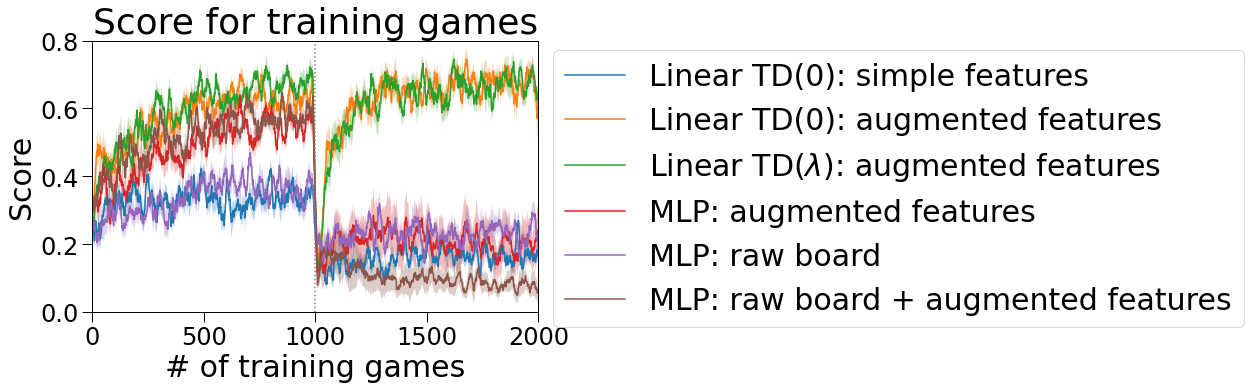

In [190]:
w = 20
calib = np.convolve(np.ones(n_train_games+n_train_games_post_reversal), np.ones(w), 'same')

plt.figure(figsize=(8,5))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []

    for i in range(10):
        all_score = 1*np.array(data['pool_results'][i]) + 0.5*np.array(data['pool_draws'][i])
        all_mean_smooth_score.append(np.convolve(all_score, np.ones(w), 'same') / calib)
    all_mean_smooth_score_mean = np.mean(np.stack(all_mean_smooth_score),axis=0)
    all_mean_smooth_score_sem = np.std(np.stack(all_mean_smooth_score),axis=0)/np.sqrt(10)
    plt.plot(range(n_train_games+n_train_games_post_reversal),all_mean_smooth_score_mean,label=data_name[idx])
    plt.fill_between(range(n_train_games+n_train_games_post_reversal),all_mean_smooth_score_mean-all_mean_smooth_score_sem, 
                     all_mean_smooth_score_mean+all_mean_smooth_score_sem,alpha=0.3)
plt.plot([1000,1000],[0,0.8],':',color='gray')
plt.ylim([0,0.8])
plt.xlim([0,2000])
plt.legend(bbox_to_anchor=(1,1.02),fontsize=30)
plt.xlabel('# of training games',fontsize=30)
plt.ylabel('Score',fontsize=30)
plt.title('Score for training games',fontsize=36);

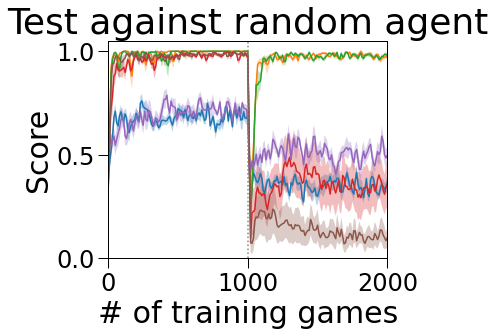

In [145]:
w = 2
calib = np.convolve(np.ones(len(data11['pool_test_results_rand'][0])), np.ones(w), 'same')
plt.figure(figsize=(5,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []
    smooth_score_rand = []

    for i in range(10):
        all_score_rand = 1*np.array(data['pool_test_results_rand'][i]) + 0.5*np.array(data['pool_test_draws_rand'][i])
        smooth_score_rand.append(np.convolve(all_score_rand, np.ones(w), 'same') / calib)

    smooth_score_rand_mean = np.mean(np.stack(smooth_score_rand),axis=0)
    smooth_score_rand_sem = np.std(np.stack(smooth_score_rand),axis=0)/np.sqrt(10)

    x = np.arange(0,n_train_games+n_train_games_post_reversal+1,test_frequency)
    plt.plot(x,smooth_score_rand_mean, label=data_name[idx])
    plt.fill_between(x,smooth_score_rand_mean-smooth_score_rand_sem, 
                     smooth_score_rand_mean+smooth_score_rand_sem,alpha=0.3)

plt.plot([1000,1000],[0,1.05],':',color='gray')
plt.ylim([0,1.05])
plt.xlim([0,2000])
# plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('# of training games',fontsize=30)
plt.ylabel('Score',fontsize=30)
plt.title('Test against random agent',fontsize=36);

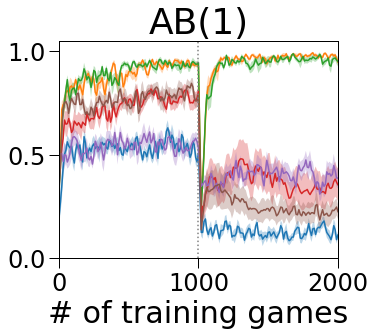

In [110]:
plt.figure(figsize=(5,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []
    smooth_score_rand = []

    for i in range(10):
        all_score_rand = 1*np.array(data['pool_test_results_1'][i]) + 0.5*np.array(data['pool_test_draws_1'][i])
        smooth_score_rand.append(np.convolve(all_score_rand, np.ones(w), 'same') / calib)

    smooth_score_rand_mean = np.mean(np.stack(smooth_score_rand),axis=0)
    smooth_score_rand_sem = np.std(np.stack(smooth_score_rand),axis=0)/np.sqrt(10)

    x = np.arange(0,n_train_games+n_train_games_post_reversal+1,test_frequency)
    plt.plot(x,smooth_score_rand_mean, label=data_name[idx])
    plt.fill_between(x,smooth_score_rand_mean-smooth_score_rand_sem, 
                     smooth_score_rand_mean+smooth_score_rand_sem,alpha=0.3)
plt.plot([1000,1000],[0,1.05],':',color='gray')
plt.ylim([0,1.05])
plt.xlim([0,2000])
# plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('# of training games',fontsize=30)
# plt.ylabel('Score',fontsize=30)
plt.title('AB(1)',fontsize=36);

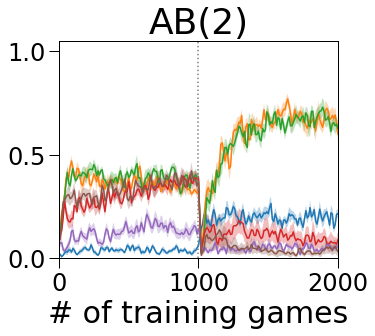

In [111]:
plt.figure(figsize=(5,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []
    smooth_score_rand = []

    for i in range(10):
        all_score_rand = 1*np.array(data['pool_test_results_2'][i]) + 0.5*np.array(data['pool_test_draws_2'][i])
        smooth_score_rand.append(np.convolve(all_score_rand, np.ones(w), 'same') / calib)

    smooth_score_rand_mean = np.mean(np.stack(smooth_score_rand),axis=0)
    smooth_score_rand_sem = np.std(np.stack(smooth_score_rand),axis=0)/np.sqrt(10)

    x = np.arange(0,n_train_games+n_train_games_post_reversal+1,test_frequency)
    plt.plot(x,smooth_score_rand_mean, label=data_name[idx])
    plt.fill_between(x,smooth_score_rand_mean-smooth_score_rand_sem, 
                     smooth_score_rand_mean+smooth_score_rand_sem,alpha=0.3)
plt.plot([1000,1000],[0,1.05],':',color='gray')
plt.ylim([0,1.05])
plt.xlim([0,2000])
# plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('# of training games',fontsize=30)
# plt.ylabel('Score',fontsize=30)
plt.title('AB(2)',fontsize=36);

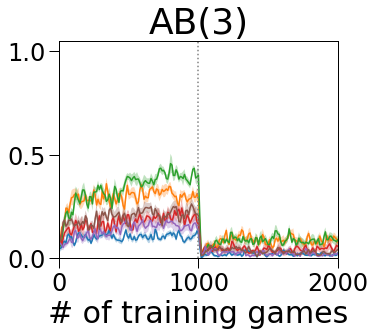

In [112]:
plt.figure(figsize=(5,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []
    smooth_score_rand = []

    for i in range(10):
        all_score_rand = 1*np.array(data['pool_test_results_3'][i]) + 0.5*np.array(data['pool_test_draws_3'][i])
        smooth_score_rand.append(np.convolve(all_score_rand, np.ones(w), 'same') / calib)

    smooth_score_rand_mean = np.mean(np.stack(smooth_score_rand),axis=0)
    smooth_score_rand_sem = np.std(np.stack(smooth_score_rand),axis=0)/np.sqrt(10)

    x = np.arange(0,n_train_games+n_train_games_post_reversal+1,test_frequency)
    plt.plot(x,smooth_score_rand_mean, label=data_name[idx])
    plt.fill_between(x,smooth_score_rand_mean-smooth_score_rand_sem, 
                     smooth_score_rand_mean+smooth_score_rand_sem,alpha=0.3)
plt.plot([1000,1000],[0,1.05],':',color='gray')
plt.ylim([0,1.05])
plt.xlim([0,2000])
# plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('# of training games',fontsize=30)
# plt.ylabel('Score',fontsize=30)
plt.title('AB(3)',fontsize=36);

In [30]:
filename = 'Experiment_dynamic_adjustment_of_alpha_and_epsilon_rand_and_AB1.pkl'
with open(filename, 'rb') as handle:
    data_dyn = pickle.load(handle)

In [42]:
filename = 'Experiment_dynamic_adjustment_of_alpha_and_epsilon_rand_and_AB1_control_group.pkl'
with open(filename, 'rb') as handle:
    data_control = pickle.load(handle)

In [47]:
filename = 'Experiment_dynamic_adjustment_of_alpha_and_epsilon_rand_and_AB1_manual_group.pkl'
with open(filename, 'rb') as handle:
    data_manual = pickle.load(handle)

In [132]:
all_data = [data_dyn, data_manual, data_control]
data_name = ['Dynamic', 'Manual', 'N/A']

In [52]:
data_dyn.keys()

dict_keys(['pool_results', 'pool_draws', 'pool_oppn_idx', 'pool_weights', 'pool_num', 'pool_rewards', 'pool_td', 'pool_test_results_rand', 'pool_test_results_1', 'pool_test_draws_rand', 'pool_test_draws_1', 'pool_td1_mean', 'pool_td1_sd', 'pool_td2_mean', 'pool_alpha', 'pool_epsilon'])

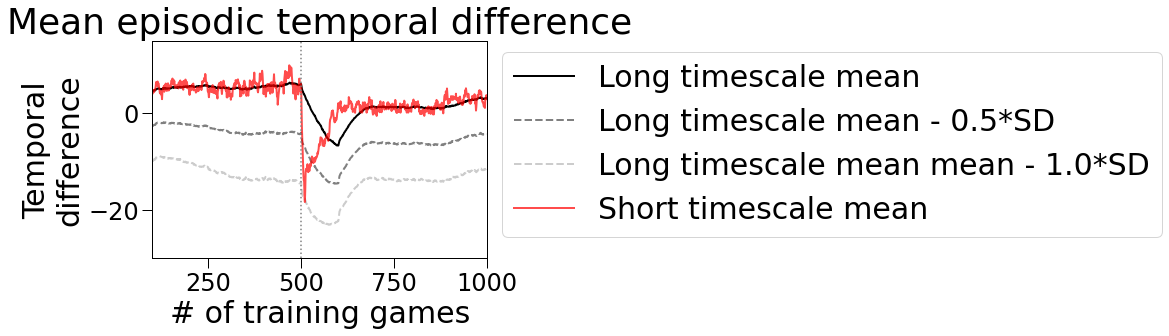

In [114]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(100+1,1000),np.stack(data_dyn['pool_td1_mean'],axis=1).mean(axis=-1),'k',label='Long timescale mean',linewidth=2)
plt.plot(np.arange(100+1,1000),(np.stack(data_dyn['pool_td1_mean'],axis=1)-0.5*np.stack(data_dyn['pool_td1_sd'],axis=1)).mean(axis=-1),
         '--',color='gray',label='Long timescale mean - 0.5*SD',linewidth=2)
plt.plot(np.arange(100+1,1000),(np.stack(data_dyn['pool_td1_mean'],axis=1)-np.stack(data_dyn['pool_td1_sd'],axis=1)).mean(axis=-1),
         '--',color=[0.8,0.8,0.8],label='Long timescale mean mean - 1.0*SD',linewidth=2)
plt.plot(np.arange(100+1,1000),np.stack(data_dyn['pool_td2_mean'],axis=1).mean(axis=-1),'r',alpha=0.7,label='Short timescale mean',linewidth=2)
plt.plot([500,500],[-30,15],':',color='gray')
plt.ylim([-30,15])
plt.xlim([100,1000])
plt.legend(bbox_to_anchor=(1,1.02),fontsize=30)
plt.xlabel('# of training games',fontsize=30)
plt.ylabel('Temporal\ndifference',fontsize=30)
plt.title('Mean episodic temporal difference',fontsize=36);

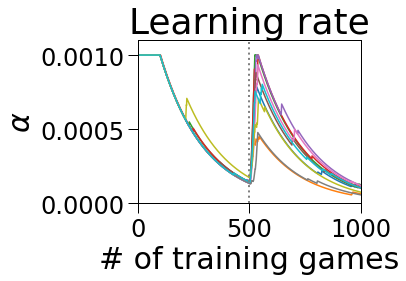

In [142]:
plt.figure(figsize=(4,3))
plt.plot(range(1000),np.stack(data_dyn['pool_alpha'],axis=1))
plt.plot([500,500],[0,1.1e-3],':',color='gray',linewidth=2)
plt.ylim([0,1.1e-3])
plt.xlim([0,1000])
plt.xlabel('# of training games',fontsize=30)
plt.ylabel(r'$\alpha$',fontsize=30)
plt.title('Learning rate',fontsize=36);

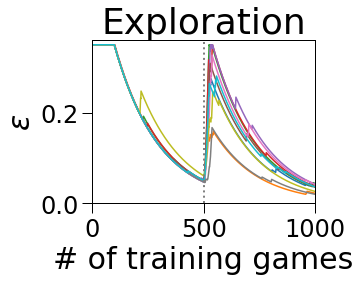

In [143]:
plt.figure(figsize=(4,3))
plt.plot(range(1000),np.stack(data_dyn['pool_epsilon'],axis=1))
plt.plot([500,500],[0,0.36],':',color='gray',linewidth=2)
plt.ylim([0,0.36])
plt.xlim([0,1000])
plt.xlabel('# of training games',fontsize=30)
plt.ylabel(r'$\epsilon$',fontsize=30)
plt.title('Exploration',fontsize=36);

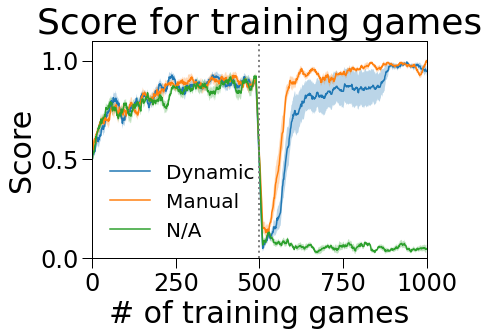

In [139]:
w = 20
calib = np.convolve(np.ones(1000), np.ones(w), 'same')
plt.figure(figsize=(6,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []

    for i in range(10):
        all_score = 1*np.array(data['pool_results'][i]) + 0.5*np.array(data['pool_draws'][i])
        all_mean_smooth_score.append(np.convolve(all_score, np.ones(w), 'same') / calib)
    all_mean_smooth_score_mean = np.mean(np.stack(all_mean_smooth_score),axis=0)
    all_mean_smooth_score_sem = np.std(np.stack(all_mean_smooth_score),axis=0)/np.sqrt(10)
    plt.plot(range(1000),all_mean_smooth_score_mean,label=data_name[idx])
    plt.fill_between(range(1000),all_mean_smooth_score_mean-all_mean_smooth_score_sem, 
                     all_mean_smooth_score_mean+all_mean_smooth_score_sem,alpha=0.3)
plt.plot([500,500],[0,1.1],':',color='gray',linewidth=2)
plt.ylim([0,1.1])
plt.xlim([0,1000])
plt.legend(fontsize=20,frameon=False)
plt.xlabel('# of training games',fontsize=30)
plt.ylabel('Score',fontsize=30)
plt.title('Score for training games',fontsize=36);

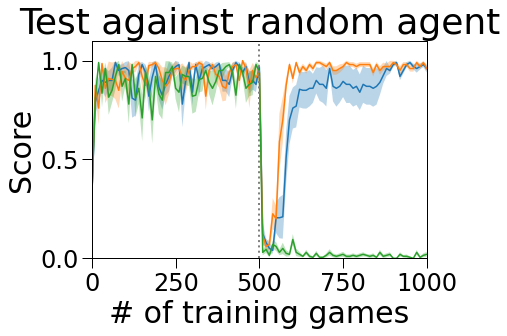

In [140]:
w = 1
calib = np.convolve(np.ones(len(data_dyn['pool_test_results_rand'][0])), np.ones(w), 'same')
plt.figure(figsize=(6,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []
    smooth_score_rand = []

    for i in range(10):
        all_score_rand = 1*np.array(data['pool_test_results_rand'][i]) + 0.5*np.array(data['pool_test_draws_rand'][i])
        smooth_score_rand.append(np.convolve(all_score_rand, np.ones(w), 'same') / calib)

    smooth_score_rand_mean = np.mean(np.stack(smooth_score_rand),axis=0)
    smooth_score_rand_sem = np.std(np.stack(smooth_score_rand),axis=0)/np.sqrt(10)

    x = np.arange(0,1000+1,10)
    plt.plot(x,smooth_score_rand_mean, label=data_name[idx])
    plt.fill_between(x,smooth_score_rand_mean-smooth_score_rand_sem, 
                     smooth_score_rand_mean+smooth_score_rand_sem,alpha=0.3)

plt.plot([500,500],[0,1.1],':',color='gray',linewidth=2)
plt.ylim([0,1.1])
plt.xlim([0,1000])
# plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('# of training games',fontsize=30)
plt.ylabel('Score',fontsize=30)
plt.title('Test against random agent',fontsize=36);

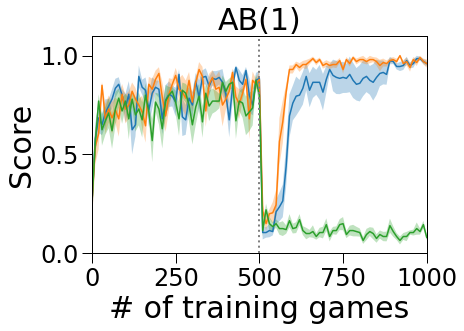

In [141]:
w = 1
calib = np.convolve(np.ones(len(data_dyn['pool_test_results_1'][0])), np.ones(w), 'same')
plt.figure(figsize=(6,4))
for idx, data in enumerate(all_data):
    all_mean_smooth_score = []
    smooth_score_rand = []

    for i in range(10):
        all_score_rand = 1*np.array(data['pool_test_results_1'][i]) + 0.5*np.array(data['pool_test_draws_1'][i])
        smooth_score_rand.append(np.convolve(all_score_rand, np.ones(w), 'same') / calib)

    smooth_score_rand_mean = np.mean(np.stack(smooth_score_rand),axis=0)
    smooth_score_rand_sem = np.std(np.stack(smooth_score_rand),axis=0)/np.sqrt(10)

    x = np.arange(0,1000+1,10)
    plt.plot(x,smooth_score_rand_mean, label=data_name[idx])
    plt.fill_between(x,smooth_score_rand_mean-smooth_score_rand_sem, 
                     smooth_score_rand_mean+smooth_score_rand_sem,alpha=0.3)

plt.plot([500,500],[0,1.1],':',color='gray',linewidth=2)
plt.ylim([0,1.1])
plt.xlim([0,1000])
# plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('# of training games',fontsize=30)
plt.ylabel('Score',fontsize=30)
plt.title('AB(1)',fontsize=30);

In [147]:
len(data11['pool_weights'][0])

2000

In [150]:
data11['pool_test_results_rand'][0][100]

0.7

In [146]:
all_weights_11 = []

for i in range(10):
    all_weights_11.append(data11['pool_weights'][i][999])

dict_keys(['pool_results', 'pool_draws', 'pool_oppn_idx', 'pool_weights', 'pool_num', 'pool_rewards', 'pool_td', 'pool_test_results_rand', 'pool_test_results_1', 'pool_test_results_2', 'pool_test_results_3', 'pool_test_draws_rand', 'pool_test_draws_1', 'pool_test_draws_2', 'pool_test_draws_3'])

In [151]:
test_rand_11 = []
test_1_11 = []
test_2_11 = []
test_3_11 = []
test_rand_33 = []
test_1_33 = []
test_2_33 = []
test_3_33 = []
for i in range(10):
    test_rand_11.extend(data11['pool_test_results_rand'][i][90:100])
    test_1_11.extend(data11['pool_test_results_1'][i][90:100])
    test_2_11.extend(data11['pool_test_results_2'][i][90:100])
    test_3_11.extend(data11['pool_test_results_3'][i][90:100])
    
    test_rand_33.extend(data33['pool_test_results_rand'][i][90:100])
    test_1_33.extend(data33['pool_test_results_1'][i][90:100])
    test_2_33.extend(data33['pool_test_results_2'][i][90:100])
    test_3_33.extend(data33['pool_test_results_3'][i][90:100])

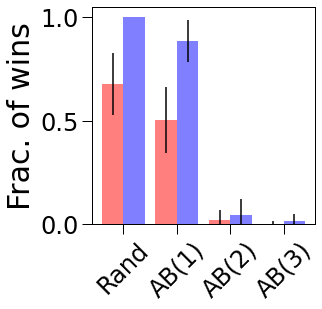

In [184]:
plt.figure(figsize=(4,4))
plt.bar(x=-0.2, height=np.mean(test_rand_11), width=0.4,yerr=np.std(test_rand_11),facecolor='r',alpha=0.5,label='Simple\nfeatures')
plt.bar(x=0.2, height=np.mean(test_rand_33), width=0.4,yerr=np.std(test_rand_33),facecolor='b',alpha=0.5,label='Augmented\nfeatures')

plt.bar(x=1-0.2, height=np.mean(test_1_11), width=0.4,yerr=np.std(test_1_11),facecolor='r',alpha=0.5)
plt.bar(x=1+0.2, height=np.mean(test_1_33), width=0.4,yerr=np.std(test_1_33),facecolor='b',alpha=0.5)

plt.bar(x=2-0.2, height=np.mean(test_2_11), width=0.4,yerr=np.std(test_2_11),facecolor='r',alpha=0.5)
plt.bar(x=2+0.2, height=np.mean(test_2_33), width=0.4,yerr=np.std(test_2_33),facecolor='b',alpha=0.5)

plt.bar(x=3-0.2, height=np.mean(test_3_11), width=0.4,yerr=np.std(test_3_11),facecolor='r',alpha=0.5)
plt.bar(x=3+0.2, height=np.mean(test_3_33), width=0.4,yerr=np.std(test_3_33),facecolor='b',alpha=0.5)

plt.xticks([0,1,2,3], labels=['Rand','AB(1)','AB(2)','AB(3)'],rotation=45)
plt.ylim([0,1.05])
# plt.legend(fontsize=20,frameon=False,bbox_to_anchor=(1,1.02))
plt.ylabel('Frac. of wins',fontsize=30);

In [178]:
draw_rand_11 = []
draw_1_11 = []
draw_2_11 = []
draw_3_11 = []
draw_rand_33 = []
draw_1_33 = []
draw_2_33 = []
draw_3_33 = []
for i in range(10):
    draw_rand_11.extend(data11['pool_test_draws_rand'][i][90:100])
    draw_1_11.extend(data11['pool_test_draws_1'][i][90:100])
    draw_2_11.extend(data11['pool_test_draws_2'][i][90:100])
    draw_3_11.extend(data11['pool_test_draws_3'][i][90:100])
    
    draw_rand_33.extend(data33['pool_test_draws_rand'][i][90:100])
    draw_1_33.extend(data33['pool_test_draws_1'][i][90:100])
    draw_2_33.extend(data33['pool_test_draws_2'][i][90:100])
    draw_3_33.extend(data33['pool_test_draws_3'][i][90:100])

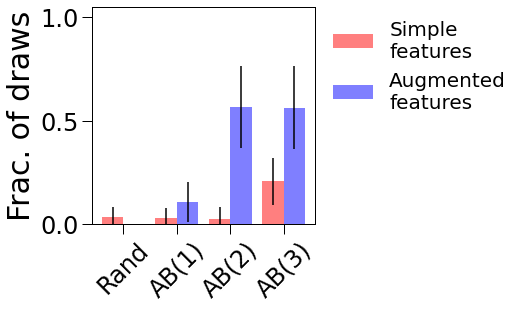

In [186]:
plt.figure(figsize=(4,4))
plt.bar(x=-0.2, height=np.mean(draw_rand_11), width=0.4,yerr=np.std(draw_rand_11),facecolor='r',alpha=0.5,label='Simple\nfeatures')
plt.bar(x=0.2, height=np.mean(draw_rand_33), width=0.4,yerr=np.std(draw_rand_33),facecolor='b',alpha=0.5,label='Augmented\nfeatures')

plt.bar(x=1-0.2, height=np.mean(draw_1_11), width=0.4,yerr=np.std(draw_1_11),facecolor='r',alpha=0.5)
plt.bar(x=1+0.2, height=np.mean(draw_1_33), width=0.4,yerr=np.std(draw_1_33),facecolor='b',alpha=0.5)

plt.bar(x=2-0.2, height=np.mean(draw_2_11), width=0.4,yerr=np.std(draw_2_11),facecolor='r',alpha=0.5)
plt.bar(x=2+0.2, height=np.mean(draw_2_33), width=0.4,yerr=np.std(draw_2_33),facecolor='b',alpha=0.5)

plt.bar(x=3-0.2, height=np.mean(draw_3_11), width=0.4,yerr=np.std(draw_3_11),facecolor='r',alpha=0.5)
plt.bar(x=3+0.2, height=np.mean(draw_3_33), width=0.4,yerr=np.std(draw_3_33),facecolor='b',alpha=0.5)

plt.xticks([0,1,2,3], labels=['Rand','AB(1)','AB(2)','AB(3)'],rotation=45)
plt.ylim([0,1.05])
plt.legend(fontsize=20,frameon=False,bbox_to_anchor=(1,1.02))
plt.ylabel('Frac. of draws',fontsize=30);